In [1]:
# For Data Manipulation
import pickle
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For ML Model Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , roc_auc_score

# For ML Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
credit = pd.read_csv(r"C:\Users\Aman Shah\Desktop\MACHINE LEARNING PROJECTS\Datasets\creditcard.csv")

In [3]:
credit.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
218698,141421.0,2.112766,-1.116445,-0.608063,-0.944910,-1.058612,-0.329735,-1.103612,0.035881,-0.017793,...,0.353526,1.012190,0.066095,-0.382160,-0.152958,-0.083228,-0.000569,-0.060031,29.95,0
54697,46571.0,1.107030,-0.159488,1.373366,0.951827,-1.180151,-0.454256,-0.508930,-0.015804,0.742122,...,-0.041570,0.063702,0.035142,0.791100,0.237499,0.289688,0.019240,0.037667,35.99,0
197336,131963.0,2.197787,-1.557318,-0.740253,-1.814497,-1.076331,0.305007,-1.423705,0.070990,-1.320138,...,-0.366719,-0.701296,0.366452,0.042513,-0.524849,-0.504840,0.026026,-0.035548,54.50,0
75542,56114.0,1.087529,-0.620426,0.846225,0.200569,-1.029722,-0.076061,-0.543697,0.055454,1.210021,...,-0.215166,-0.535819,-0.055801,-0.032697,0.176789,0.964445,-0.048958,0.023846,90.77,0
32462,36813.0,1.052549,0.070034,0.409709,0.989992,-0.198804,-0.090223,-0.017549,0.093856,-0.188786,...,0.052950,0.060089,-0.044078,-0.002880,0.415657,-0.430667,0.024866,0.020087,52.98,0


In [4]:
print(f"Original Shape of Dataset : {credit.shape}")
print(f"Checkig for the Missing or Null Values : {credit.isna().sum().sum()}")
print(f"Checkig for Duplicates Values : {credit.duplicated().sum()}")

Original Shape of Dataset : (284807, 31)
Checkig for the Missing or Null Values : 0
Checkig for Duplicates Values : 1081


In [5]:
credit_clean = credit.drop_duplicates()
print(f"After Removing Duplicates Shape of Dataset : {credit_clean.shape}")
print(f"Checkig for Duplicates Values : {credit_clean.duplicated().sum()}")

After Removing Duplicates Shape of Dataset : (283726, 31)
Checkig for Duplicates Values : 0


In [6]:
credit_clean.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


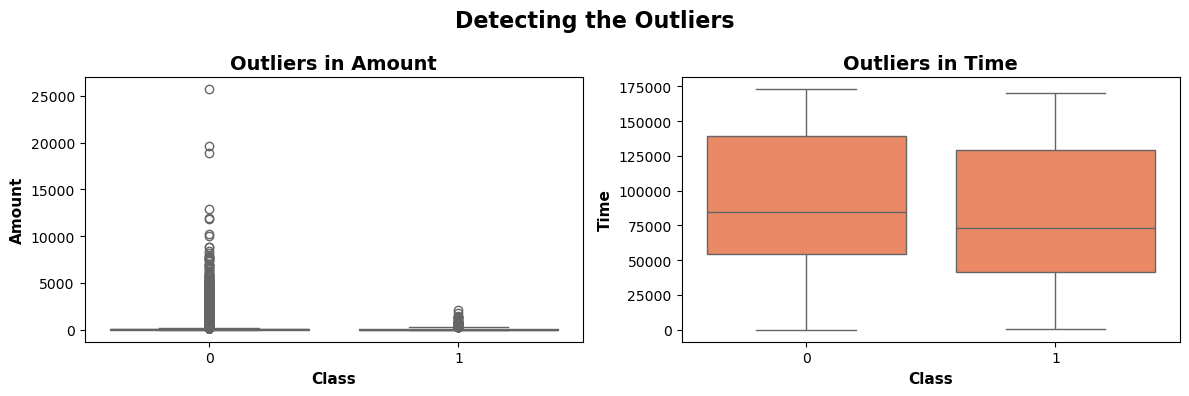

In [7]:
# Detecting the Outliers

fig , ax = plt.subplots(1 , 2 , figsize=(12,4))
ax = ax.flatten()

sns.boxplot( x = 'Class' , y = 'Amount' , data = credit_clean , ax = ax[0] , color = 'coral' )
ax[0].set_xlabel('Class' , fontsize = 11 , fontweight = 'bold' )
ax[0].set_ylabel('Amount' , fontsize = 11 , fontweight = 'bold' )
ax[0].set_title('Outliers in Amount' , fontsize = 14 , fontweight = 'bold' )

sns.boxplot( x = 'Class' , y = 'Time' , data = credit_clean , ax = ax[1] , color = 'coral' )
ax[1].set_xlabel('Class' , fontsize = 11 , fontweight = 'bold' )
ax[1].set_ylabel('Time' , fontsize = 11 , fontweight = 'bold' )
ax[1].set_title('Outliers in Time' , fontsize = 14 , fontweight = 'bold' )

plt.suptitle('Detecting the Outliers' , fontsize = 16 , fontweight = 'bold' )
plt.tight_layout()
plt.show()

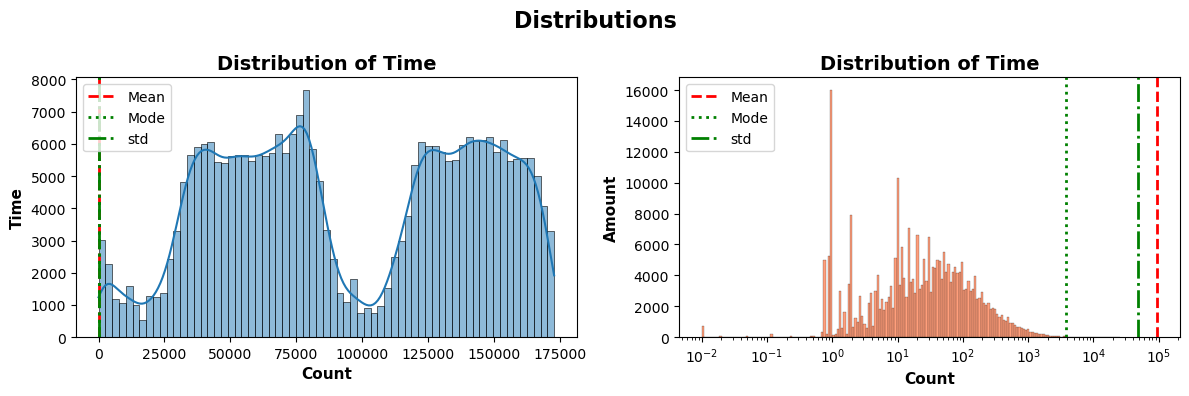

In [8]:
# Distribution of Amount , Time 

mean_amount = credit_clean['Amount'].mean()
mode_amount = credit_clean['Amount'].mode()[0]
std_amount = credit_clean['Amount'].std()

mean_time = credit_clean['Time'].mean()
mode_time = credit_clean['Time'].mode()[0]
std_time = credit_clean['Time'].std()

fig , ax = plt.subplots(1 , 2 , figsize=(12,4))
ax = ax.flatten()

sns.histplot( x = 'Time' , data = credit_clean , kde = True , ax = ax[0])
ax[0].set_xlabel('Count' , fontsize = 11 , fontweight = 'bold' )
ax[0].set_ylabel('Time' , fontsize = 11 , fontweight = 'bold' )
ax[0].set_title('Distribution of Time' , fontsize = 14 , fontweight = 'bold' )
ax[0].axvline(mean_amount, color='red', linestyle='dashed', linewidth=2, label='Mean')
ax[0].axvline(mode_amount, color='green', linestyle='dotted', linewidth=2, label='Mode')
ax[0].axvline(std_amount, color='green', linestyle='dashdot', linewidth=2, label='std')
ax[0].legend()

sns.histplot(credit_clean[credit_clean['Amount'] > 0]['Amount'], ax = ax[1], color='coral', log_scale = True, kde = False)
ax[1].set_xlabel('Count' , fontsize = 11 , fontweight = 'bold' )
ax[1].set_ylabel('Amount' , fontsize = 11 , fontweight = 'bold' )
ax[1].set_title('Distribution of Time' , fontsize = 14 , fontweight = 'bold' )
ax[1].axvline(mean_time, color='red', linestyle='dashed', linewidth=2, label='Mean')
ax[1].axvline(mode_time, color='green', linestyle='dotted', linewidth=2, label='Mode')
ax[1].axvline(std_time, color='green', linestyle='dashdot', linewidth=2, label='std')
ax[1].legend()

plt.suptitle('Distributions' , fontsize = 16 , fontweight = 'bold' )
plt.tight_layout()
plt.show()

In [9]:
X = credit_clean.drop('Class' , axis = 1)
y = credit_clean['Class']

In [10]:
# Split Data

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 42 , stratify = y )

In [11]:
print(f'Training Class Distribution \n {y_train.value_counts()}')
print(f'Testing Class Distribution \n {y_test.value_counts()}')

Training Class Distribution 
 Class
0    212439
1       355
Name: count, dtype: int64
Testing Class Distribution 
 Class
0    70814
1      118
Name: count, dtype: int64


In [12]:
preprocessor = ColumnTransformer(
    transformers = [
        ('Scale' , RobustScaler() , ['Time' , 'Amount'])
    ],
    remainder = 'passthrough'
)

In [ ]:
# Declaring Algorithms

Classifiers = {
    'LogisticRegression' : LogisticRegression(
        random_state = 42,
        class_weight = 'balanced', 
        C = 0.1,
        max_iter = 1000
    ),

    'DecisionTree' : DecisionTreeClassifier(
        random_state = 42,
        class_weight = 'balanced',
        max_depth = 8,
        min_samples_split = 20, 
        min_samples_leaf = 10
    ),

    'RandomForest' : RandomForestClassifier(
        n_estimators = 1000,
        random_state = 42,
        class_weight = 'balanced',
        max_depth = 10,
        min_samples_split = 10,
        min_samples_leaf = 5,
    ),

    'KNN' : KNeighborsClassifier(
        n_neighbors = 5,
        weights = 'distance'
    ),
}


		Training LogisticRegression
Accuracy: 0.9741
ROC AUC SCORE: 0.965481066896185

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     70814
           1       0.05      0.88      0.10       118

    accuracy                           0.97     70932
   macro avg       0.53      0.93      0.54     70932
weighted avg       1.00      0.97      0.99     70932



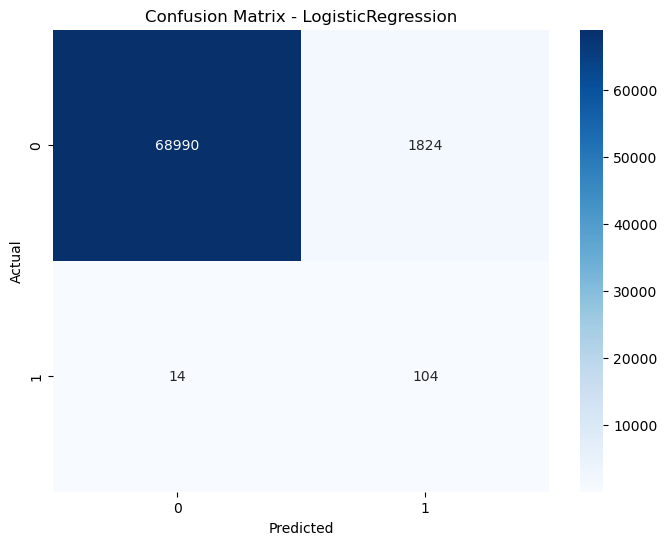


		Training DecisionTree
Accuracy: 0.9834
ROC AUC SCORE: 0.9378826867041996

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     70814
           1       0.08      0.86      0.15       118

    accuracy                           0.98     70932
   macro avg       0.54      0.92      0.57     70932
weighted avg       1.00      0.98      0.99     70932



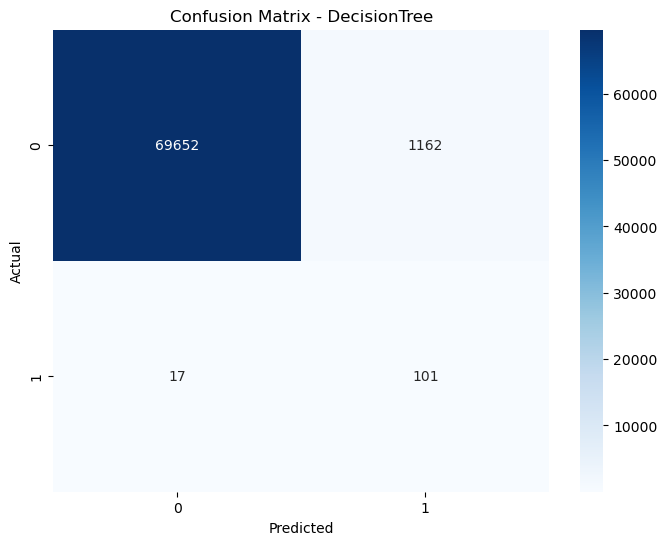


		Training RandomForest
Accuracy: 0.9988
ROC AUC SCORE: 0.98236547594486

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.61      0.82      0.70       118

    accuracy                           1.00     70932
   macro avg       0.80      0.91      0.85     70932
weighted avg       1.00      1.00      1.00     70932



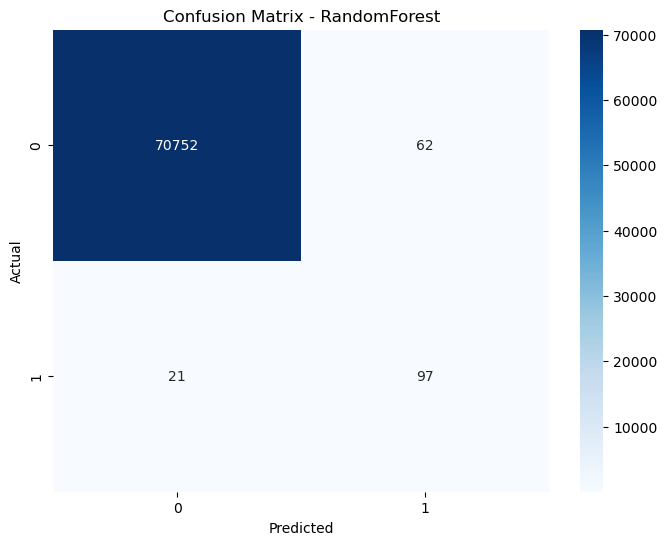


		Training KNN
Accuracy: 0.9983
ROC AUC SCORE: 0.9105967746490807

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.49      0.81      0.61       118

    accuracy                           1.00     70932
   macro avg       0.75      0.91      0.81     70932
weighted avg       1.00      1.00      1.00     70932



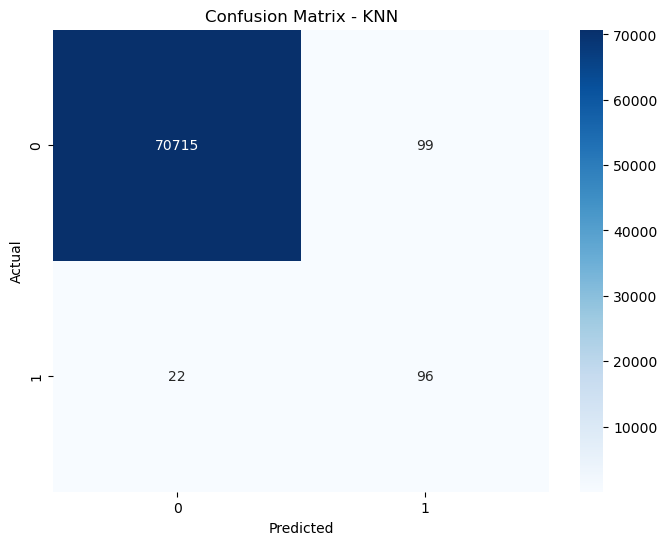


MODEL COMPARISON
                Model  Accuracy   ROC AUC
0  LogisticRegression  0.974088  0.965481
1        DecisionTree  0.983378  0.937883
2        RandomForest  0.998830  0.982365
3                 KNN  0.998294  0.910597
CPU times: total: 40min 5s
Wall time: 40min 8s


,Model,Accuracy,ROC AUC
0,LogisticRegression,0.974088,0.965481
1,DecisionTree,0.983378,0.937883
2,RandomForest,0.998830,0.982365
3,KNN,0.998294,0.910597


In [ ]:
%%time

results = {}

for name, classifier in Classifiers.items():

    print("\n" + "="*50)
    print(f"\t\tTraining {name}")
    print("="*50)

    model_pipe = ImbPipeline([
        ('preprocessor', preprocessor),
        ('SMOTE', SMOTE(random_state=42, sampling_strategy=0.1)),
        ('Classifier', classifier)
    ])

    # Train Model
    model_pipe.fit(X_train, y_train)
    y_pred = model_pipe.predict(X_test)

    # Some models do not support predict_proba
    try:
        y_pred_proba = model_pipe.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    except:
        y_pred_proba = None
        roc_auc = None

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}") 
    print(f"ROC AUC SCORE: {roc_auc}")
    print("\nClassification Report")
    print(classification_report(y_test, y_pred))

    # Store results
    results[name] = {
        "Model": model_pipe,
        "y_pred": y_pred,
        "y_pred_proba": y_pred_proba,
        "Accuracy": accuracy,
        "Roc AUC": roc_auc
    }

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Save Model
    pickle.dump(model_pipe,
                open(f"C:\\Users\\Aman Shah\\Desktop\\MACHINE LEARNING PROJECTS\\Models\\{name}.pkl", 'wb')
    )

# ---------------------------------------------------------
#        MODEL COMPARISON TABLE
# ---------------------------------------------------------

print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)

comparison_df = pd.DataFrame({
    "Model": list(results.keys()),
    "Accuracy": [results[name]["Accuracy"] for name in results.keys()],
    "ROC AUC": [results[name]["Roc AUC"] for name in results.keys()],
})

print(comparison_df)
comparison_df
